In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [25]:
#import dataset
dt = pd.read_csv('Social_Network_Ads.csv')
X = dt.iloc[:,[2, 3]].values
y = dt.iloc[:, 4].values
print(dt.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


No handles with labels found to put in legend.


4


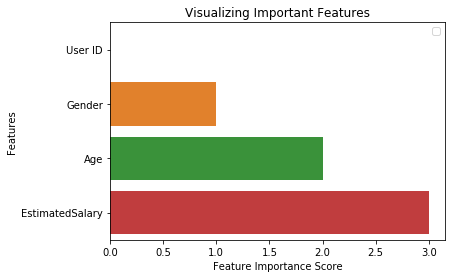

In [67]:
'''
Finding important features in input dataset

'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
feature_frame = dt.iloc[:, :-1]
print(feature_frame.shape[1])
sns.barplot(x=range(feature_frame.shape[1]), y=feature_frame.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 0)

# Feature scaling TO NORMALISE
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
# random forest classifier
#decsion tree

rfclassifier = RandomForestClassifier(n_estimators= 20,criterion='entropy', random_state =0)
rfclassifier.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
y_pred = rfclassifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [29]:
# to know correct and incorrect predictions we use confusion matrox

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[63  5]
 [ 4 28]]


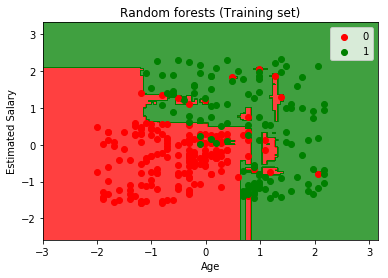

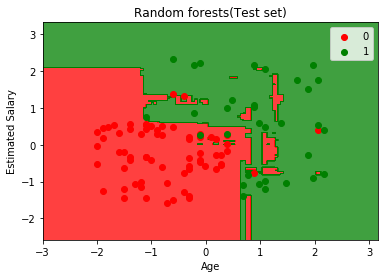

In [30]:
# 8 samples are predicted wrong

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rfclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random forests (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rfclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random forests(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.94      0.93      0.93        68
          1       0.85      0.88      0.86        32

avg / total       0.91      0.91      0.91       100



In [33]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  91.0


In [34]:
#compute L1 -loss function

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.09

In [35]:
#compute L2 - loss function

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.09

In [37]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

3.1085298554134715

In [38]:
'''
We can infer that random forests classfication performs better in classification, and we have high accuracy and low loss than decsion treee approach in
The model predicts the customer whois likely to buy based on age, estimated ,salary

'''

'\nWe can infer that random forests classfication performs better in classification, and we have high accuracy and low loss than decsion treee approach in\nThe model predicts the customer whois likely to buy based on age, estimated ,salary\n\n'

In [44]:
importances = rfclassifier.feature_importances_

In [45]:
indices = np.argsort(importances)[::-1]